# Section 1 predicting with  Dummy values

In [124]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [119]:

# Function to load images from a directory
def load_images_from_directory(directory):
    image_files = [os.path.join(directory, file) for file in os.listdir(directory) if file.lower().endswith(('png', 'jpg', 'jpeg'))]
    return image_files

nicolas_cage_path = '/content/extracted_celebs/Celeb photos/Nicolas Cage'  # Update with your path
not_cage_path = '/content/extracted_celebs/Celeb photos/Not Cage'  # Update with your path

nicolas_cage_images = load_images_from_directory(nicolas_cage_path)
not_cage_images = load_images_from_directory(not_cage_path)

# Combine both lists to display all images together
all_images = nicolas_cage_images + not_cage_images
all_labels = ['Nicolas Cage'] * len(nicolas_cage_images) + ['Not Cage'] * len(not_cage_images)


In [121]:
# Load and preprocess images
def load_and_preprocess_images(image_paths):
    images = []
    for image_path in image_paths:
        try:
            img = Image.open(image_path).convert('RGB')  # Ensure the image is in RGB format
            img = img.resize(image_size)
            images.append(np.array(img))
        except Exception as e:
            print(f"Error loading image {image_path}: {e}")  # Print the error if occurs
    return np.array(images)

# Prepare images
image_size = (100, 100)  # Size in pixels
images = load_and_preprocess_images(all_images)
images = images.astype('float32') / 255.0  # Normalize the image data

In [122]:
# Create a simple CNN model (adjust based on your needs)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Dummy prediction (replace with your actual prediction logic)
predictions = [1 if "Nicolas Cage" in label else 0 for label in all_labels]  # Replace with actual model predictions


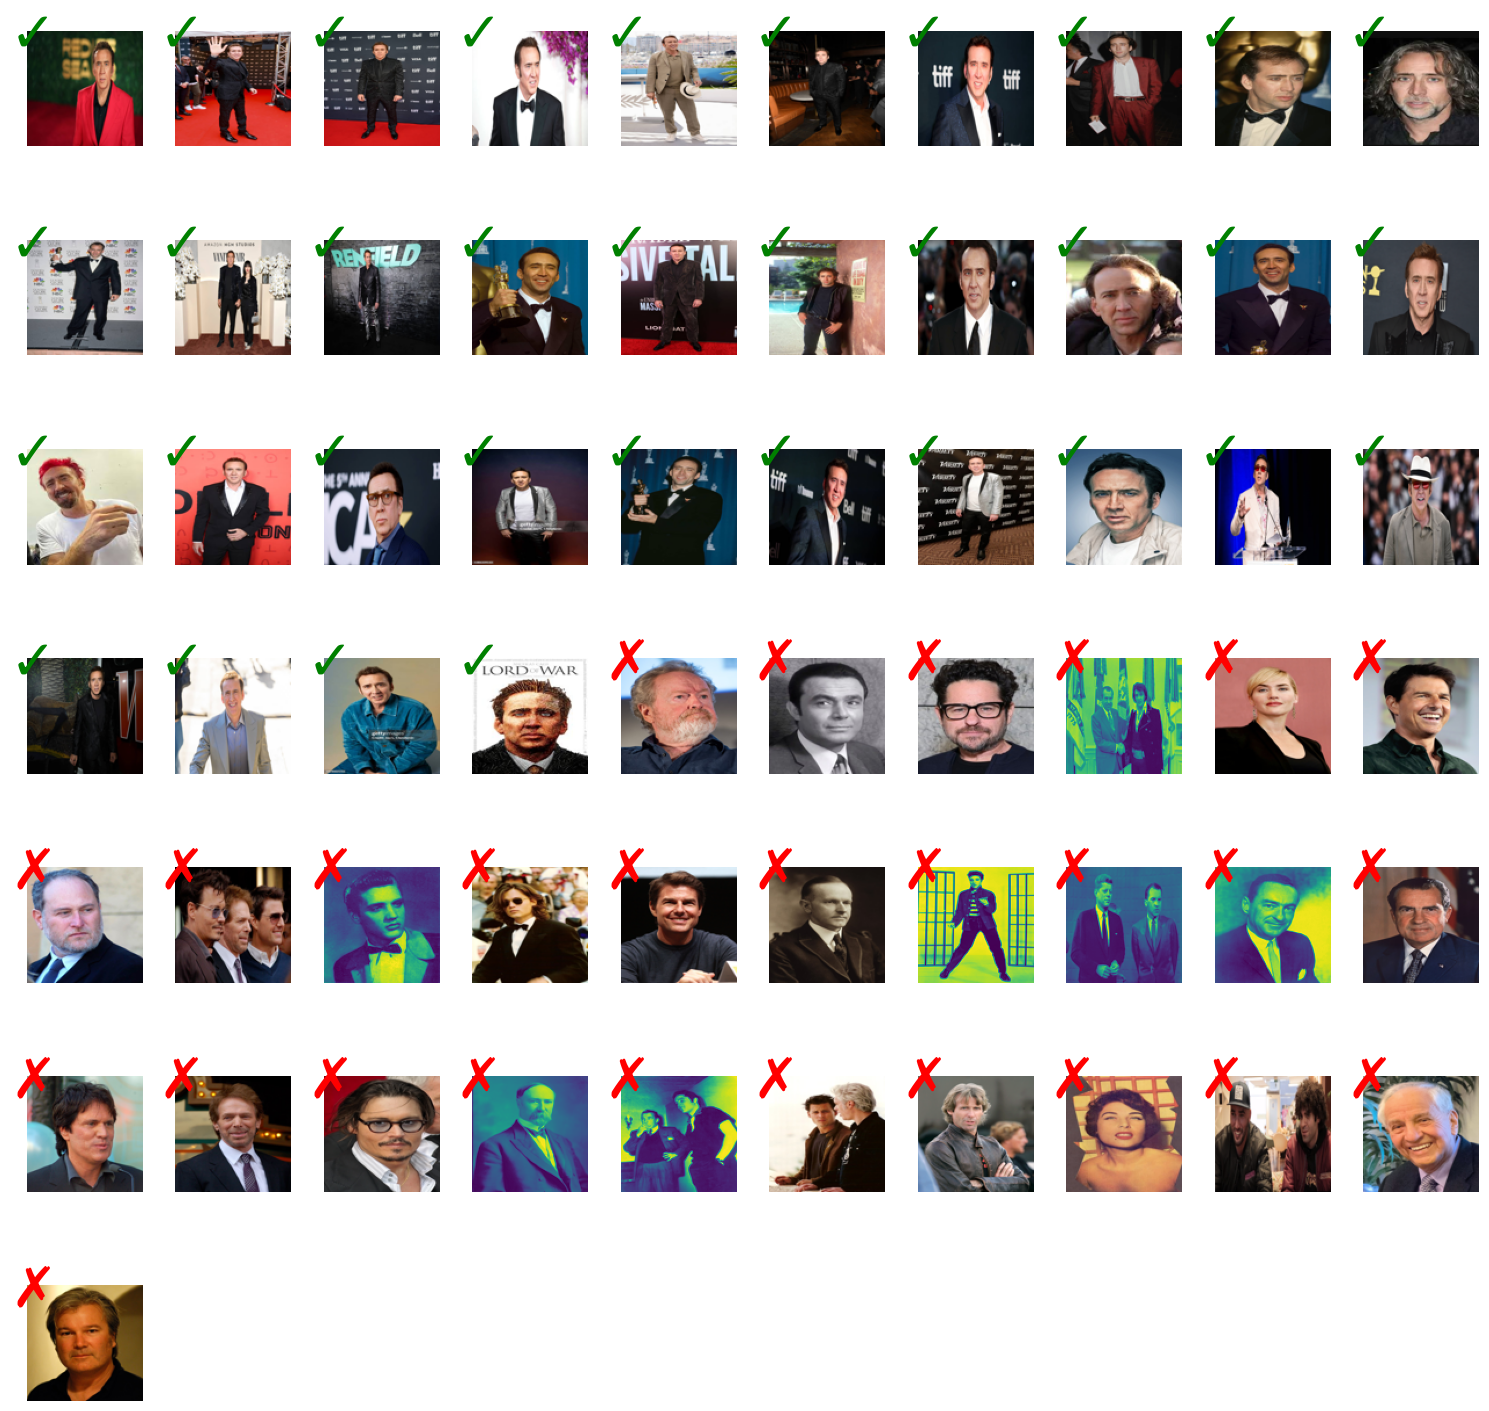

In [123]:

# Display the images with ticks and crosses
plt.figure(figsize=(15, 15))

for i, (image_path, prediction) in enumerate(zip(all_images, predictions)):
    img = Image.open(image_path).resize(image_size)
    ax = plt.subplot(7, 10, i + 1)
    ax.imshow(img)
    ax.axis('off')  # Hide the axis

    # Overlay check or cross based on prediction
    if prediction == 1:
        ax.text(5, 5, '✓', fontsize=40, color='green', ha='center', va='center')  # Green tick
    else:
        ax.text(5, 5, '✗', fontsize=40, color='red', ha='center', va='center')  # Red cross

plt.tight_layout()
plt.show()

# Section2  predicting by Spliting the data and traing , validation

In [128]:
# Encode labels (1 for Nicolas Cage, 0 for Not Cage)
labels = [1 if label == 'Nicolas Cage' else 0 for label in all_labels]
labels = np.array(labels)

In [129]:
# Split data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

# Create a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),  # Added another Conv Layer for better performance
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),  # Added a dense layer
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [130]:
# Data augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2,
                             height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True,
                             fill_mode='nearest')

# Fit the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_val, y_val),
                    steps_per_epoch=len(X_train) // 32,
                    validation_steps=len(X_val) // 32,
                    epochs=20)  # You can adjust the number of epochs as needed

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3750 - loss: 0.7029 - val_accuracy: 0.5000 - val_loss: 2.4940
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.5000 - loss: 2.8186 - val_accuracy: 0.5000 - val_loss: 0.7873
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.7873
Epoch 4/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step - accuracy: 0.5000 - loss: 0.7693 - val_accuracy: 0.5000 - val_loss: 0.6701
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step - accuracy: 0.4062 - loss: 0.7741 - val_accuracy: 0.5000 - val_loss: 0.6733
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6733
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.3750 - loss: 0.7535 - val_accuracy: 0.5000 - val_loss: 0.6708
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.4688 - loss: 0.7072 - val_accuracy: 0.5000 - val_loss: 0.6768
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6768
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - accuracy: 0.6250 - loss: 0.6862 - val_accuracy: 0.5000 - val_loss: 0.6834
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.5312 - loss: 0.6820 - val_accuracy: 0.5000 - val_

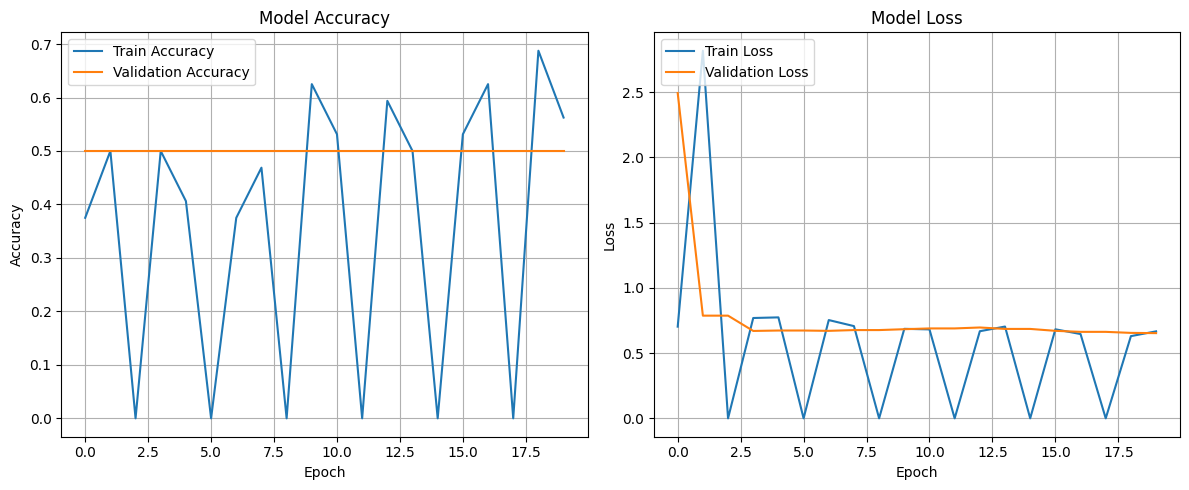

In [133]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


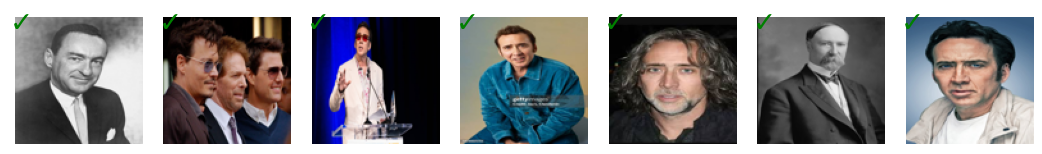

In [131]:
# Predictions on the test set
predictions = model.predict(X_test)
predictions = [1 if pred > 0.5 else 0 for pred in predictions]  # Convert probabilities to binary predictions

# Display the test images with ticks and crosses
plt.figure(figsize=(15, 15))

for i, (image, prediction) in enumerate(zip(X_test, predictions)):
    ax = plt.subplot(7, 10, i + 1)
    ax.imshow(image)
    ax.axis('off')  # Hide the axis

    # Overlay check or cross based on prediction
    if prediction == 1:
        ax.text(5, 5, '✓', fontsize=20, color='green', ha='center', va='center')  # Green tick
    else:
        ax.text(5, 5, '✗', fontsize=20, color='red', ha='center', va='center')  # Red cross

plt.tight_layout()
plt.show()